# Logistic Regression using GD and SGD

## Logistic Regression with Gradient Descent

Generate two clusters of data points with 100 points each (so that the total data size is n = 200), by sampling from Gaussian distributions centered at (0:5, 0:5) and (0:5, 0:5)

Taking data dimension d = 2

### Generating Gaussian Data

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#center for the first (blue) cluster - (0.5,0.5)
m1 = [0.5,0.5]
#center for the second cluster (red) - (-0.5,-0.5)
m2 = [-0.5,-0.5]
# d=2 hence a 2x2 covariance matrix to generate the data
cov = [[0.05,0],[0,0.05]]

In [61]:
#Generating  100 random points whose mean lies at (0.5,0.5) 
cluster1 = np.random.multivariate_normal(m1, cov, 100) 
#adding a label '1' to the blue cluster
c1 = np.insert(cluster1, 2, 1.0, axis=1)

#Generating 100 random points whose mean lies at (-0.5,-0.5)
cluster2 = np.random.multivariate_normal(m2, cov, 100) 
#adding a label '0' to the blue cluster
c2 = np.insert(cluster2, 2, 0.0, axis=1)

#Taken labels as (0,1) instead of (-1,1) to be able to plot better.

Text(0, 0.5, 'y co-ordinate')

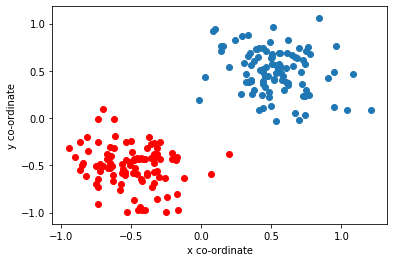

In [62]:
#plot to  verify that the clusters are correct and well separated
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1],color='r')
plt.xlabel('x co-ordinate')
plt.ylabel('y co-ordinate')

From the above plot we can see that the data points are well separated

In [63]:
#combine the two clusters into a single dataset
dataset = np.concatenate((c1,c2))
#verifying size of final dataset
len(dataset)

200

### Initialization 

Training a logistic regression model that tries to minimize L(w) using Gradient Descent

In [64]:
#Create a random 80-20 split of data into training and testing data
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]
#verifying the split 
print("len of train:{}".format(len(train)))
print("len of test:{}".format(len(test)))

len of train:158
len of test:42


In [65]:
#X = all the cols except the last one
#y = label to be predicted
X = train[:,:-1]
y = train[:,-1]

#Get all dimensions aligned
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:,np.newaxis]   


#initialize w with 
w = np.zeros((X.shape[1],1))
X.shape

(158, 3)

### Define functions

$$ h(z) = \frac{1}{1+e^{-z}} $$
where, z = <w_i,x_i>

In [66]:
#To calculate h(z)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
#Compute dot product
def compute_z(w, x):
    return np.dot(x,w)

In [68]:
#calculate the probablity , ie, h(z)
def hz(w, x):
    return sigmoid(compute_z(w, x))

$$ L(w) = \frac{1}{n} . (-y log(hz) - (1-y) log(1-hz)  $$

where $$ hz = h(z) $$
and $$ z = wX $$

In [69]:
#Cost function L(w) for Logistic Regression
def cost_function(w, x, y):
    n = x.shape[0]
    total_cost = -(1 / n) * np.sum(y * np.log(hz(w, x)) + (1 - y) * np.log(1 - hz(w, x)))
    return total_cost

$$ \frac{\partial L(w)}{\partial w_j} = \frac{1}{n} X^T (h(Xw) - y) $$

In [70]:
#Compute gradient
def gradient(w, x, y):
    n = x.shape[0]
    return (1 / n) * np.dot(x.T, sigmoid(compute_z(w,   x)) - y)

In [71]:
#Update the weights or w's according to the slope at current point
def gradient_descent(X, y, w, T, alpha):
    cost = np.zeros(T)
    for i in range(T):
        #calculate the gradient at current point
        grad = gradient(w,X,y)
        #update values of set of weights depending on learning rate alpha
        w = w - alpha*grad
        #store the cost in an array to plot later
        cost[i] = cost_function(w,X,y)
    return w,cost

### Running Gradient Descent

Set hyperparameters

In [112]:
#learning rate
alpha = 0.1
#Number of epochs/iterations
T = 1000

w_star_gd,cost = gradient_descent(X,y,w,T,alpha)

final_cost = cost_function(w_star_gd,X,y)

In [113]:
final_cost

0.0343135561029094

In [114]:
#final values of w
w_star_gd

array([[-0.05035815],
       [ 3.91721773],
       [ 3.8511832 ]])

Text(0.5, 1.0, 'Error vs. Training Epoch for Gradient Descent')

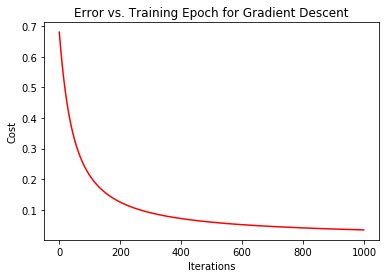

In [115]:
#plot the decay of the loss function against number of iterations 
fig, ax = plt.subplots()  
ax.plot(np.arange(T), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch for Gradient Descent') 

### Decision Boundary

In [1]:
#plotting decision boundary
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1],color='r')

x_vals_gd = np.arange(-1, 1, 0.2)

y_vals_gd = -(w_star_gd[0] + w_star_gd[1] * x_vals_gd)/w_star_gd[2]
plt.plot(x_vals_gd,y_vals_gd,label='Decision Boundary GD',c='b')
plt.title('Logistic Regession using Gradient Descent',c='k')
plt.xlabel('x-coordinates')
plt.ylabel('y-coordinates')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## Logistic Regression with Mini-batch Stochastic Gradient Descent

Training the same logistic regression algorithm with SGD to show that SGD has a slower rate of convergence but converges faster per iteration.

Randomize the dataset for SGD to converge a little faster

In [96]:
#Get a batch to run SGD on
def next_batch(X, y, batch_size):
    # loop over the dataset `X` in mini-batches of size `batchSize`
    #np.arange(start,stop,step) , stop not included
    for i in np.arange(0, X.shape[0], batch_size):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batch_size], y[i:i + batch_size])

In [97]:
#Update the weights or w's according to the slope at current point
def SGD(X, y, w, T, alpha, batch_size):
    cost = []
    for i in range(T):
        #calculate the gradient at current point
        for (batch_X,batch_Y) in next_batch(X, y, batch_size):
            loss = []
            grad = gradient(w,batch_X,batch_Y)
            #update values of set of weights depending on learning rate alpha
            w = w - alpha*grad
            l = cost_function(w,X,y)
            #store the cost in an array to plot later
            loss.append(l)
        #append average cost of each batch to final cost
        cost.append(np.average(loss))
    return w,cost

### Running SGD

In [116]:
alpha_sgd = 0.1          #learning rate
T_sgd = 1000               #Number of epochs/iterations
batch_size = 32       #Batch size
w = np.zeros((X.shape[1],1))

w_star_sgd,cost_sgd = SGD(X,y,w,T_sgd,alpha_sgd,batch_size)

#final_cost_sgd = cost_function(w_star_sgd,X,y)

Text(0.5, 1.0, 'Error vs. Training Epoch for Stochastic Gradient Descent')

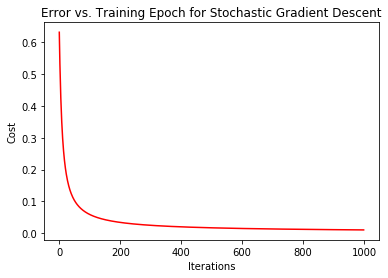

In [117]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(T_sgd), cost_sgd, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch for Stochastic Gradient Descent') 

Comparing the above plot to that of Gradient Descent, we can see that SGD converges at around the 600th iteration but has a slower rate of convergence.

### Overlay of plot of data points and both the models

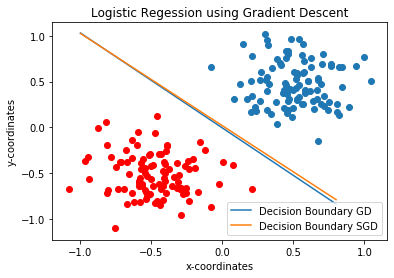

[[0.02649062]
 [3.99902791]
 [3.85957114]]
-----------------
[[-0.10502637]
 [ 6.03444855]
 [ 5.99011572]]


In [42]:
#plotting decision boundary
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1],color='r')


x_vals_gd = np.arange(-1, 1, 0.2)

#For Gradient Descent
y_vals_gd = -(w_star_gd[0] + w_star_gd[1] * x_vals_gd)/w_star_gd[2]
plt.plot(x_vals_gd,y_vals_gd,label='Decision Boundary GD')
plt.title('Logistic Regession using Gradient Descent',c='k')

#For Stochastic Gradient Descent
y_vals_sgd = -(w_star_sgd[0] + w_star_sgd[1] * x_vals_gd)/w_star_sgd[2]
plt.plot(x_vals_gd, y_vals_sgd, label='Decision Boundary SGD')
plt.title('Logistic Regession using Gradient Descent',c='k')
plt.xlabel('x-coordinates')
plt.ylabel('y-coordinates')
plt.legend()
plt.show()

print(w_star_gd)
print("-----------------")
print(w_star_sgd)

From the above plot we can see that both the methods perform correct classification of the dataset and there is no difference in final quality of the model.